In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
concrete_data=pd.read_csv('concretedata.csv')
concrete_data

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
#--->>>> Doing EDA

In [76]:
concrete_data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [77]:
concrete_data.tail()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [78]:
df=pd.DataFrame(data=concrete_data)
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [7]:
df.shape

(1030, 9)

In [8]:
df.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [9]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

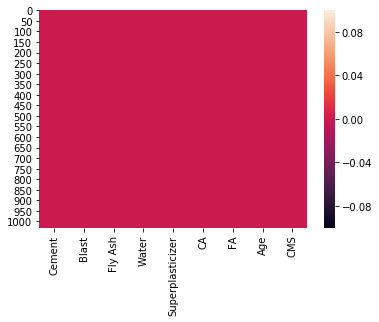

In [11]:
sns.heatmap(df.isnull())

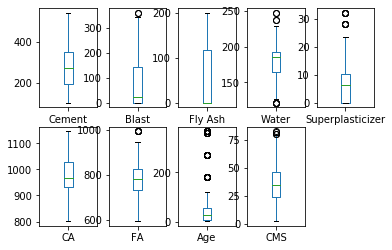

In [12]:
df.plot(kind='box',subplots=True,layout=(2,5))
plt.show()

In [13]:
df[2:6]

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [60]:
def linreg():
    lm=LinearRegression()
    lm.fit(x,y)
    print('score=',lm.score(x,y))
    print('coefficient=',lm.coef_)
    print('Intercept=',lm.intercept_)

In [79]:
linreg()

score= 0.06604078800795576
coefficient= [[-0.08574922]]
Intercept= [186.21389009]


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [63]:
x_train.shape

(721, 1)

In [64]:
y_train.shape

(721, 1)

In [65]:
x_test.shape

(309, 1)

In [66]:
y_test.shape

(309, 1)

In [67]:
lm=LinearRegression()

In [68]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lm.coef_

array([[-0.07180853]])

In [70]:
lm.intercept_

array([185.06119475])

In [71]:
lm.score(x_train,y_train)

0.04831480988813053

In [72]:
pred=lm.predict(x_test)
print("predicted result",pred)
print("actual result",y_test)

predicted result [[185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [176.07076706]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [176.13539474]
 [178.18911864]
 [185.06119475]
 [185.06119475]
 [179.38832105]
 [177.88752282]
 [185.06119475]
 [185.06119475]
 [178.19629949]
 [178.31119313]
 [185.06119475]
 [173.0691706 ]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [176.05640536]
 [179.38832105]
 [183.30188582]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [177.85161855]
 [185.06119475]
 [177.8444377 ]
 [185.06119475]
 [185.06119475]
 [178.59842724]
 [173.57901115]
 [180.82449161]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [185.06119475]
 [177.01863963]
 [178.18911864]
 [173.57901115]
 [180.75268308]
 [176.30773521]
 [179.38832105]
 [185.06119475]
 [174.93619232]
 [185.06119475]
 [178.2

In [73]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.0975466153925737


In [54]:
print("error:")
print(mean_squared_error(y_test,pred))

error:
443.0934449019059


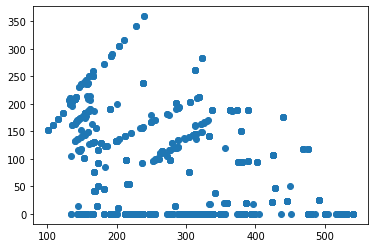

In [40]:
plt.scatter(df['Cement'],df['Blast'])
plt.show()

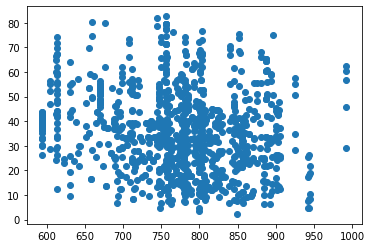

In [41]:
plt.scatter(df['FA'],df['CMS'])
plt.show()